In [ ]:
'''
ПРИКЛАД 1.2

https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata


Цей набір даних надає всебічний огляд у світі кінематографу, досліджуючи деталі різних фільмів, 
які охоплюють різні жанри, режисерів, акторський склад та рік випуску. Він містить інформацію про технічні характеристики фільмів, 
такі як тривалість, формат відео, аудіо, а також такі фактори, як касові збори, критичні оцінки та нагороди.
 Крім того, в наборі даних можуть бути включені відомості про сценаристів, саундтреки, технічні ефекти та інші важливі аспекти, що характеризують фільми.
'''

In [1]:
import pandas as pd 
import numpy as np
film = pd.read_csv('dataset/movies.csv', low_memory=False)
print(film)

def generate_distribution_sample(data, sample_size, dist_size): 
    sample_means = []
    for i in range(dist_size):
        sample = np.random.choice(a = data, size = sample_size) 
        sample_means.append(np.mean(sample))
    return sample_means

sample_size = 1000
dist_size = 5000
sample_means = generate_distribution_sample(film['budget'], sample_size, dist_size)


         budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.

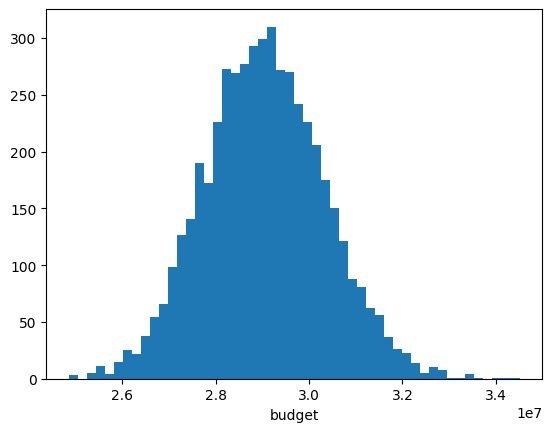

In [2]:
import matplotlib.pyplot as plt 
plt.hist(sample_means, bins=50) 
plt.xlabel('budget') 
plt.show()

In [3]:
np.sort(sample_means)
lb = np.percentile(sample_means, 2.5)
ub = np.percentile(sample_means, 97.5)
print("conf interval for bootstrap:", (lb, ub))

conf interval for bootstrap: (26610510.184525, 31635052.226325)


In [49]:
'''
ПРИКЛАД 1.3

https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

У статистиці t-критерій Стьюдента – це набір методів для перевірки гіпотез, 
які часто його використовують для перевірки рівності середніх значень вибірки. 
Для цього потрібно, щоб було обчислена спочатку t-статистика, після чого її 
потрібно порівняти з деяким граничним значенням, що дозволить прийняти рішення 
про прийняття або відхилення самої гіпотези.

T-статистика будується за таким принципом: 
у чисельнику вказується величина з нульовим математичним очікуванням, 
а в знаменнику – стандартне відхилення від цієї випадкової величини.

Алгоритм перевірки гіпотез побудований за таким принципом: 
для початку потрібно, щоб була визначена деяка нульова гіпотеза. 
У разі порівняння середніх потрібно прийняти припущення, 
що середні значення за двома вибірками рівні. 
Також визначається альтернативне їй припущення – нерівність середніх значень. 
Після цього обчислюється t-статистика і порівнюється з показником p-value 
(ймовірність прийняття нульової гіпотези).

P-value – це ймовірність прийняття нульової гіпотези за умови, 
що справедлива альтернативна гіпотеза. 
Тобто, якщо p-value дуже маленьке значення, 
то, швидше за все, не відбуваються взагалі якісь випадкові процеси. 
Але якщо ж p-value досить велике, то ймовірність того, що вибірки, 
отримані випадковим чином, не мають ніяких зв’язків, дуже значна.


'''

'\nПРИКЛАД 1.3\n\nhttps://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata\n\nУ статистиці t-критерій Стьюдента – це набір методів для перевірки гіпотез, \nякі часто його використовують для перевірки рівності середніх значень вибірки. \nДля цього потрібно, щоб було обчислена спочатку t-статистика, після чого її \nпотрібно порівняти з деяким граничним значенням, що дозволить прийняти рішення \nпро прийняття або відхилення самої гіпотези.\n\nT-статистика будується за таким принципом: \nу чисельнику вказується величина з нульовим математичним очікуванням, \nа в знаменнику – стандартне відхилення від цієї випадкової величини.\n\nАлгоритм перевірки гіпотез побудований за таким принципом: \nдля початку потрібно, щоб була визначена деяка нульова гіпотеза. \nУ разі порівняння середніх потрібно прийняти припущення, \nщо середні значення за двома вибірками рівні. \nТакож визначається альтернативне їй припущення – нерівність середніх значень. \nПісля цього обчислюється t-статистика і порівнюється

In [4]:
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline
set_1 = pd.read_csv('dataset/movies.csv', low_memory=False)


In [5]:
sample = set_1['budget'].sample(n=3000) 
print(stats.ttest_1samp(sample, 0.05))

TtestResult(statistic=38.910967417525214, pvalue=1.7643693408989925e-268, df=2999)


In [6]:
set_1.shape

(4803, 20)

In [7]:
print(stats.ttest_ind(set_1['budget'].sample(n=200), 
                      set_1['vote_count'].sample(n=200)))

TtestResult(statistic=9.462947204563923, pvalue=2.669274333740984e-19, df=398.0)


In [8]:
print(stats.ttest_ind(set_1['budget'].sample(n=4500), 
                      set_1['vote_count'].sample(n=4500)))

TtestResult(statistic=48.11500010325157, pvalue=0.0, df=8998.0)


In [9]:
control = set_1['revenue'].sample(n=3500)
treatment = set_1['budget'].sample(n=3500)
print(stats.ttest_rel(control, treatment))


TtestResult(statistic=19.21969564644421, pvalue=2.4167090776347077e-78, df=3499)
